# PREPARE

## MODULES IMPORT

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import seaborn as sns

## CLEAN DATA IMPORT

In [5]:
df = pd.read_csv('./boston_clean.csv')

### CHANGING TYPE OF COLUMNS THAT USING TIME AS VALUES

In [7]:
time_columns = ['Pace', '5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', 'Official Time']
df[time_columns] = df[time_columns].apply(lambda col: pd.to_timedelta(col, errors='coerce'))

# BASIC INFORMATION

In [9]:
num_participants = len(df) # number of participants
print(f"Number of participants: {num_participants}")

Number of participants: 79638


## PARTICIPANT ATTRIBUTES
The dataset contains the following attributes for each marathon participant:
- Name, gender, age
- Country and city
- Split times at each 5K
- Pace, official finish time, rank
- Year of participation

# UNIVARIATE ANALYSIS

## 1. M/F ---------------------------------

In [13]:
gender = df['M/F']

### M/F

#### M/F - lab

In [16]:
gender_count = gender.value_counts() # gender count
gender_percent = round(gender.value_counts(normalize=True) * 100, 2) # gender percentage
df_mf_dist = pd.concat([gender_count, gender_percent], axis=1) # gender count + percentage
df_mf_dist

,count,proportion
M/F,,
M,43482,54.6
F,36156,45.4


#### M/F - export

In [18]:
df_mf_dist.to_csv('./export/mf_dist.csv')

### M/F - visualization

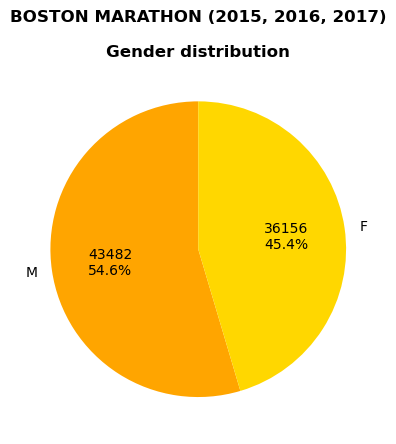

In [20]:
x = df_mf_dist['count']
labels = df_mf_dist.index

ax = plt.pie(x=x, labels=labels, colors=['orange','gold'], startangle=90, autopct= lambda pct: f"{round(pct/100*gender_count.sum())}\n{pct:.1f}%")

plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nGender distribution', fontweight='bold')

plt.savefig("./vexport/gender.png", dpi=300, bbox_inches='tight')
plt.show()

## 2. AGE ---------------------------------

In [22]:
age = df['Age']

### AGE

#### AGE - lab

In [25]:
age_max = age.max() # max age 
age_min = age.min() # min age
age_avg = round(age.mean(), 2) # average age
age_med = age.median() # median age

print(f"Max age of participants: {age_max}")
print(f"Min age of participants: {age_min}")
print(f"Average age: {age_avg}")
print(f"Median age: {age_med}")

Max age of participants: 84
Min age of participants: 18
Average age: 42.42
Median age: 42.0


#### AGE - export

### AGE - visualization

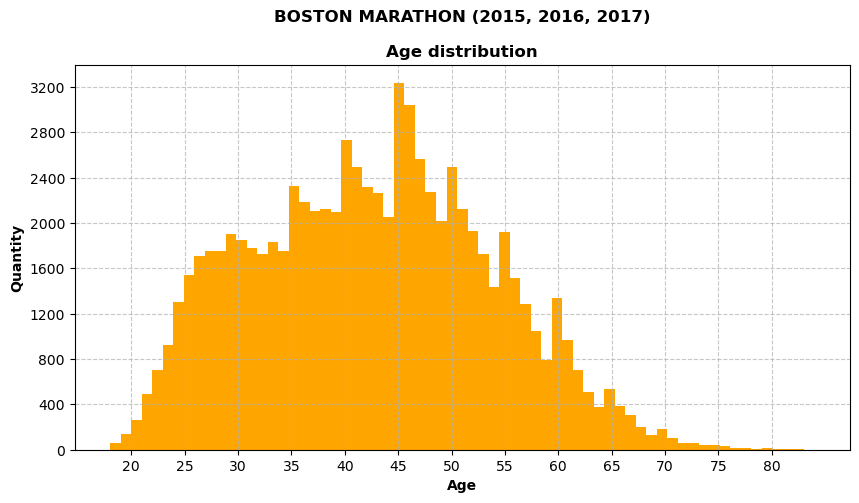

In [28]:
plt.figure(figsize=(10,5))

plt.hist(x=age, bins=67, color='orange')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(20, 84, 5))
plt.yticks(np.arange(0, 3201, 400))

plt.xlabel('Age', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nAge distribution', fontweight='bold')

plt.savefig("./vexport/age.png", dpi=300, bbox_inches='tight')
plt.show()

### DISTRIBUTION OF AGE GROUPS

In [30]:
age_groups = df['Age Group']

#### DISTRIBUTION OF AGE GROUPS - lab

In [32]:
# count of age groups
age_groups_count = age_groups.value_counts().sort_index()

# percentage of age groups
age_groups_percent = round(age_groups.value_counts(normalize=True).sort_index() * 100, 2)

# count and percentage
df_age_groups_dist = pd.concat([age_groups_count, age_groups_percent], axis=1)
df_age_groups_dist

,count,proportion
Age Group,,
18–21,952,1.20
22–25,4461,5.60
26–29,7128,8.95
30–33,7188,9.03
34–37,8379,10.52
38–41,9457,11.87
42–45,9875,12.40
46–49,9900,12.43
50–53,8282,10.40


#### DISTRIBUTION OF AGE GROUPS - export

In [34]:
df_age_groups_dist.to_csv('./export/age_groups_dist.csv')

### DISTRIBUTION OF AGE GROUPS - visualization

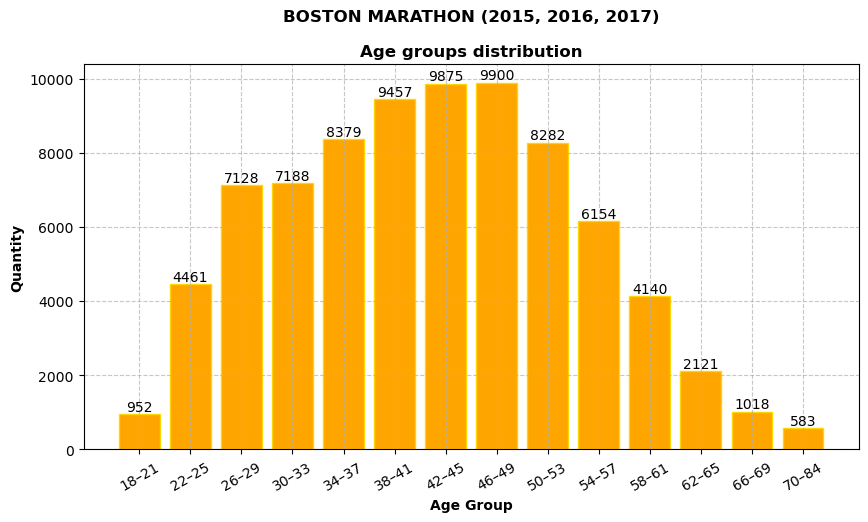

In [36]:
x = df_age_groups_dist.index
y = df_age_groups_dist['count']

plt.figure(figsize=(10,5))

ax = plt.bar(x, y, color='orange', edgecolor='gold')

for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=30)

plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nAge groups distribution', fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')

plt.savefig("./vexport/age_groups.png", dpi=300, bbox_inches='tight')
plt.show()

## 3. COUNTRY ---------------------------------

In [38]:
country = df['Country']

### COUNTRY

#### COUNTRY - lab

In [41]:
# number of countries
country_num = country.nunique() 

# count of every participant country
country_count = country.value_counts() 

# count of every participant country in percentage
country_percent = round(country.value_counts(normalize=True) * 100, 1) 

# every country count and percentage
df_country_dist = pd.concat([country_count, country_percent], axis=1)

print(f"Number of countries: {country_num}")
df_country_dist.head(10)

Number of countries: 105


,count,proportion
Country,,
USA,64474,81.0
CAN,6171,7.7
GBR,1072,1.3
MEX,768,1.0
GER,573,0.7
JPN,491,0.6
AUS,475,0.6
ITA,474,0.6
CHN,430,0.5


#### COUNTRY - export

In [43]:
df_country_dist.to_csv('./export/country_dist.csv')

### COUNTRY - visualization

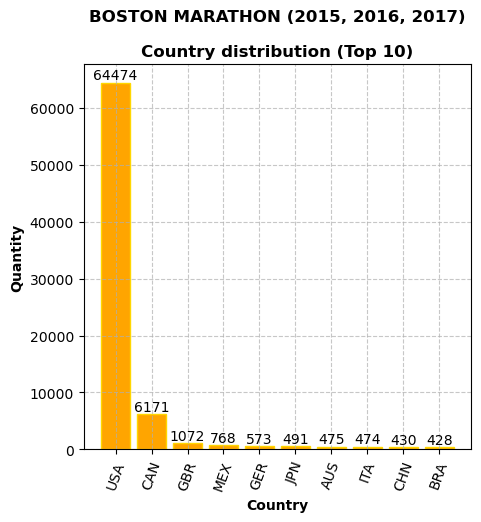

In [45]:
x = df_country_dist.head(10).index
y = df_country_dist.head(10)['count']

plt.figure(figsize=(5,5))

ax = plt.bar(x, y, color='orange', edgecolor='gold')

for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=70)

plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nCountry distribution (Top 10)', fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')

plt.savefig("./vexport/country.png", dpi=300, bbox_inches='tight')
plt.show()

#### COUNTRY - visualization without USA

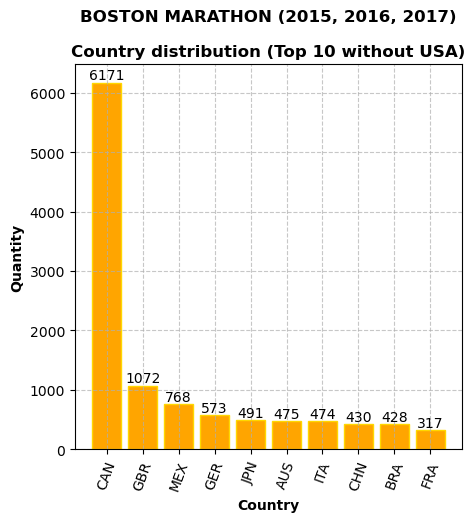

In [47]:
df_country_dist_noUSA = df_country_dist[df_country_dist['count'] != df_country_dist['count'].max()]

x = df_country_dist_noUSA.head(10).index
y = df_country_dist_noUSA.head(10)['count']

plt.figure(figsize=(5,5))

ax = plt.bar(x, y, color='orange', edgecolor='gold')

for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=70)

plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nCountry distribution (Top 10 without USA)', fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')

plt.savefig("./vexport/country_noUSA.png", dpi=300, bbox_inches='tight')
plt.show()

#### COUNTRY - visualization without USA, CANADA

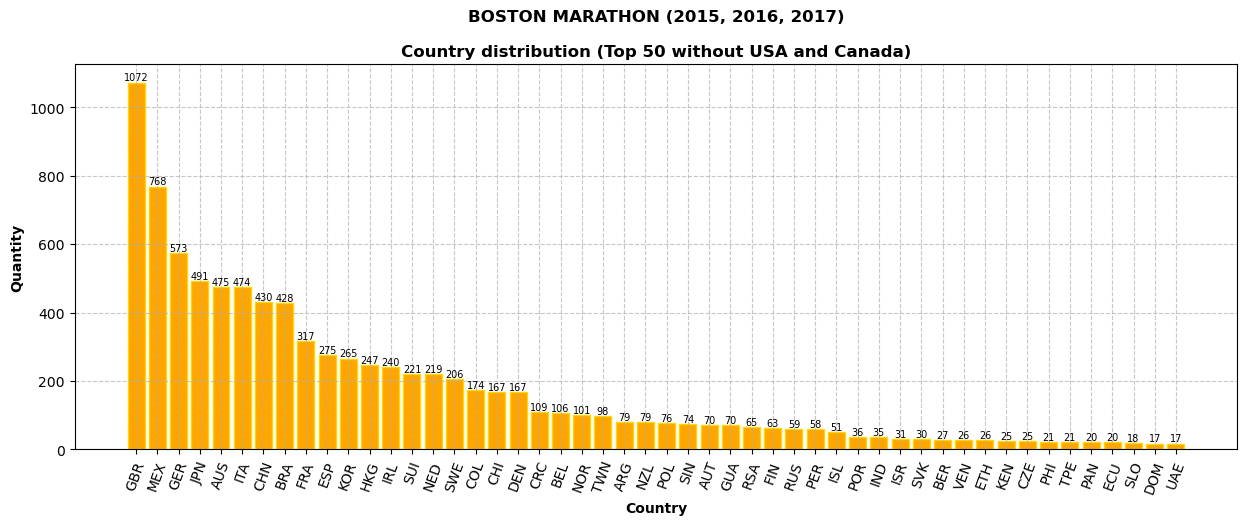

In [49]:
df_country_dist_noUSAnoCAN = df_country_dist_noUSA[df_country_dist_noUSA['count'] != df_country_dist_noUSA['count'].max()]

x = df_country_dist_noUSAnoCAN.head(50).index
y = df_country_dist_noUSAnoCAN.head(50)['count']

plt.figure(figsize=(15,5))

ax = plt.bar(x, y, color='orange', edgecolor='gold')

for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom', fontsize=7)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=70)

plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nCountry distribution (Top 50 without USA and Canada)', fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')

plt.savefig("./vexport/country_noUSA_noCAN.png", dpi=300, bbox_inches='tight')
plt.show()

### CONTINENT

In [51]:
continent = df['Continent']

#### CONTINENT - lab

In [53]:
# participant count by continent from they are
continent_count = continent.value_counts()

# same but in percentage
continent_percent = round(continent.value_counts(normalize=True) * 100, 1)

# count + percentage
df_continent_dist = pd.concat([continent_count, continent_percent], axis=1)
df_continent_dist

,count,proportion
Continent,,
North America,71701,90.0
Europe,4499,5.6
Asia,1772,2.2
South America,971,1.2
Oceania,554,0.7
Africa,141,0.2


#### CONTINENT - export

In [55]:
df_continent_dist.to_csv('./export/continent_dist.csv')

### CONTINENT - visualization

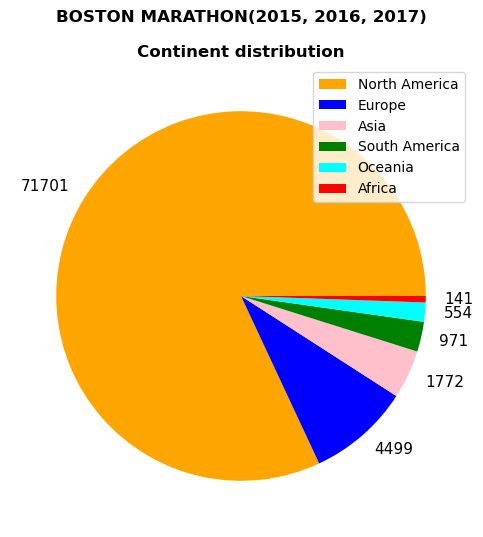

In [57]:
x = df_continent_dist['count'] ** 0.8
labels = df_continent_dist['count']
continents = df_continent_dist.index

plt.figure(figsize=(6,6))
ax = plt.pie(x=x, labels=labels, rotatelabels=False, labeldistance=1.1, textprops={'fontsize': 11}, colors=['orange', 'blue', 'pink', 'green', 'cyan', 'red'])

plt.legend(continents)
plt.title('BOSTON MARATHON(2015, 2016, 2017)\n\nContinent distribution', fontweight='bold')

plt.savefig("./vexport/continent.png", dpi=300, bbox_inches='tight')
plt.show()

## 4. TIME ---------------------------------

### OFFICIAL TIME

In [60]:
official_time = df['Official Time']

#### OFFICIAL TIME - lab

In [62]:
# official finish time
time_fastest = official_time.min()
time_longest = official_time.max()
time_avg = official_time.mean()
time_med = official_time.median()

print('OFFICIAL FINISH TIME STATISTICS')
print(f"Fastest time in marathon is: {str(time_fastest)[7:]}")
print(f"Longest time in marathon is: {str(time_longest)[7:]}")
print(f"Average time in marathon is: {str(time_avg)[7:15]}")
print(f"Median time in marathon is: {str(time_med)[7:]}")

OFFICIAL FINISH TIME STATISTICS
Fastest time in marathon is: 02:09:17
Longest time in marathon is: 10:30:23
Average time in marathon is: 03:53:09
Median time in marathon is: 03:46:32


#### OFFICIAL TIME - export

### OFFICIAL TIME - visualization

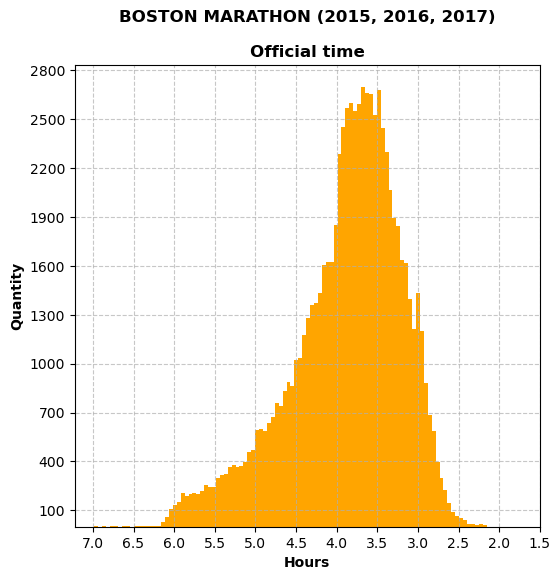

In [65]:
official_time_inhours = official_time.dt.total_seconds() / 3600
threshold = 7
official_time_inhours_filtered = official_time_inhours[official_time_inhours < threshold]

plt.figure(figsize=(6,6))

plt.hist(official_time_inhours_filtered, bins=100, color='orange')
plt.gca().invert_xaxis()
plt.xticks(np.arange(7, 1, -0.5))
plt.yticks(np.arange(100,2801,300))
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Hours', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nOfficial time', fontweight='bold')

plt.savefig("./vexport/officialtime.png", dpi=300, bbox_inches='tight')
plt.show()

### PACE

In [67]:
pace = df['Pace'] 

#### PACE - lab

In [69]:
# pace
pace_fastest = pace.min()
pace_longest = pace.max()
pace_avg = pace.mean()
pace_med = pace.median()

print('PACE STATISTICS')
print(f"Fastest pace in marathon is: {str(pace_fastest)[11:18] + ' min/km'}")
print(f"Longest pace in marathon is: {str(pace_longest)[10:18] + ' min/km'}")
print(f"Average pace in marathon is: {str(pace_avg)[11:18] + ' min/km'}")
print(f"Median pace in marathon is: {str(pace_med)[11:18] + ' min/km'}")

PACE STATISTICS
Fastest pace in marathon is: 3:03.92 min/km
Longest pace in marathon is: 15:13.41 min/km
Average pace in marathon is: 5:31.86 min/km
Median pace in marathon is: 5:22.49 min/km


#### PACE - export

### PACE - visualization

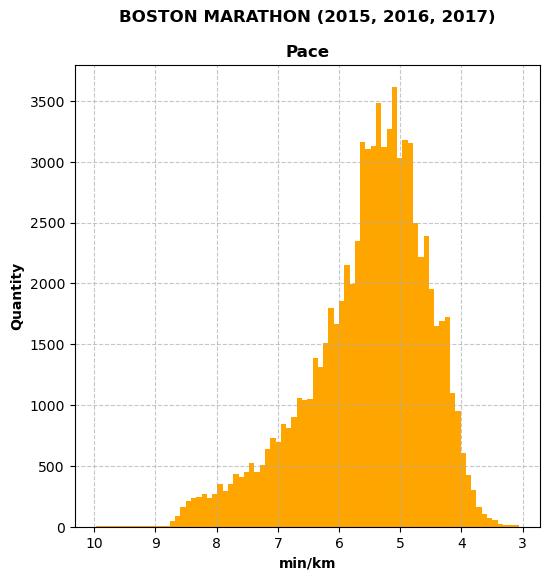

In [72]:
pace_inminutes = pace.dt.total_seconds() / 60
threshold = 10
pace_inminutes_filtered = pace_inminutes[pace_inminutes < 10]

plt.figure(figsize=(6,6))

plt.hist(pace_inminutes_filtered, bins=80, color='orange')
plt.gca().invert_xaxis()
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('min/km', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nPace', fontweight='bold')

plt.savefig("./vexport/pace.png", dpi=300, bbox_inches='tight')
plt.show()

In [73]:
pace

0       0 days 00:03:03.925872902
1       0 days 00:03:04.547244094
2       0 days 00:03:05.168615286
3       0 days 00:03:05.168615286
4       0 days 00:03:05.789986478
                   ...           
79633   0 days 00:11:23.508311461
79634   0 days 00:11:31.586136960
79635   0 days 00:11:56.440984649
79636   0 days 00:11:58.926469418
79637   0 days 00:15:13.415652588
Name: Pace, Length: 79638, dtype: timedelta64[ns]

# BIVARIATE ANALYSIS

## 1. MF X AGE ---------------------------------

In [76]:
df_gender_age = df[['M/F', 'Age', 'Age Group']]

df_male_age = df_gender_age[df_gender_age['M/F'] == 'M']
df_female_age = df_gender_age[df_gender_age['M/F'] == 'F']

### GENDER X AGE

#### GENDER X AGE - lab

In [79]:
df_mfxage = df_gender_age.groupby(by='M/F')['Age'].agg(
    min_age='min',
    max_age='max',
    mean_age='mean',
    median_age='median')
df_mfxage

,min_age,max_age,mean_age,median_age
M/F,,,,
F,18,84,39.770577,40.0
M,18,83,44.614185,45.0


#### GENDER X AGE - export

In [81]:
df_mfxage.to_csv('./export/mfxage.csv')

### GENDER X AGE - visualization

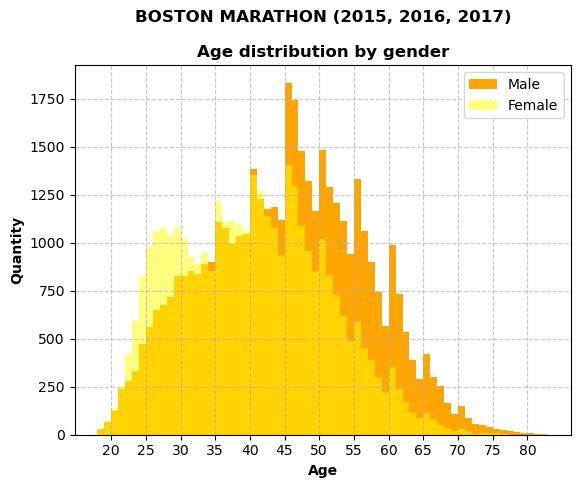

In [83]:
x_m = df_male_age['Age']
x_fm = df_female_age['Age']

plt.hist(x_m, bins= np.arange(age_min, age_max,1), alpha=1, color='orange', label='Male')
plt.hist(x_fm, bins= np.arange(age_min, age_max,1), alpha=0.5, color='yellow', label='Female')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(20,81,5))
plt.legend()

plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nAge distribution by gender', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')

plt.savefig("./vexport/genderxage.png", dpi=300, bbox_inches='tight')
plt.show()

### GENDER X AGE GROUPS

#### GENDER X AGE GROUPS - lab

In [86]:
# males
male_age_groups_count = df_male_age['Age Group'].value_counts().sort_index()
male_age_groups_percent = round(df_male_age['Age Group'].value_counts(normalize=True).sort_index() * 100,2)
# females
female_age_groups_count = df_female_age['Age Group'].value_counts().sort_index()
female_age_groups_percent = round(df_female_age['Age Group'].value_counts(normalize=True).sort_index() * 100,2)
# creating df to present results
df_male_age_groups_dist = pd.concat([male_age_groups_count, male_age_groups_percent], axis=1)
df_female_age_groups_dist = pd.concat([female_age_groups_count, female_age_groups_percent], axis=1)

print('male')
print(df_male_age_groups_dist)
print('\nfemale')
print(df_female_age_groups_dist)

male
           count  proportion
Age Group                   
18–21        460        1.06
22–25       1641        3.77
26–29       2869        6.60
30–33       3405        7.83
34–37       4082        9.39
38–41       4691       10.79
42–45       5316       12.23
46–49       5707       13.12
50–53       5089       11.70
54–57       4236        9.74
58–61       3026        6.96
62–65       1635        3.76
66–69        828        1.90
70–84        497        1.14

female
           count  proportion
Age Group                   
18–21        492        1.36
22–25       2820        7.80
26–29       4259       11.78
30–33       3783       10.46
34–37       4297       11.88
38–41       4766       13.18
42–45       4559       12.61
46–49       4193       11.60
50–53       3193        8.83
54–57       1918        5.30
58–61       1114        3.08
62–65        486        1.34
66–69        190        0.53
70–84         86        0.24


#### GENDER X AGE GROUPS - export

In [88]:
df_male_age_groups_dist.to_csv('./export/mfxagegroups_male_dist.csv')
df_female_age_groups_dist.to_csv('./export/mfxagegroups_female_dist.csv')

### GENDER X AGE GROUPS - visualization

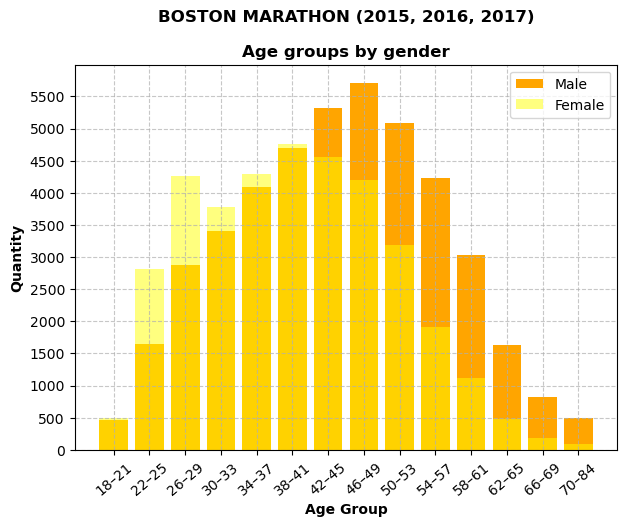

In [90]:
a

## 2. MF X COUNTRY ---------------------------------

In [92]:
df_gender_country = df[['M/F', 'Country', 'Continent']]

df_male_country = df_gender_country[df_gender_country['M/F'] == 'M']
df_female_country = df_gender_country[df_gender_country['M/F'] == 'F']

### GENDER X COUNTRY

#### GENDER X COUNTRY - lab

In [95]:
# males
male_country_count = df_male_country['Country'].value_counts()
male_country_percent = round(df_male_country['Country'].value_counts(normalize=True) * 100, 2)
# results df
df_male_country_dist = pd.concat([male_country_count, male_country_percent], axis=1)

# females
female_country_count = df_female_country['Country'].value_counts()
female_country_percent = round(df_female_country['Country'].value_counts(normalize=True) * 100, 2)
# results df
df_female_country_dist = pd.concat([female_country_count, female_country_percent], axis=1)

print(f"males country distribution:\n{df_male_country_dist.head(10)}\n")
print(f"females country distribution:\n{df_female_country_dist.head(10)}")

males country distribution:
         count  proportion
Country                   
USA      33390       76.79
CAN       3499        8.05
GBR        707        1.63
MEX        510        1.17
GER        437        1.01
ITA        378        0.87
JPN        357        0.82
CHN        307        0.71
BRA        305        0.70
AUS        294        0.68

females country distribution:
         count  proportion
Country                   
USA      31084       85.97
CAN       2672        7.39
GBR        365        1.01
MEX        258        0.71
AUS        181        0.50
GER        136        0.38
JPN        134        0.37
BRA        123        0.34
CHN        123        0.34
ITA         96        0.27


#### GENDER X COUNTRY - export

In [97]:
df_male_country_dist.to_csv('./export/mfxcountry_male_dist.csv')
df_female_country_dist.to_csv('./export/mfxcountry_female_dist.csv')

### GENDER X COUNTRY - visualization

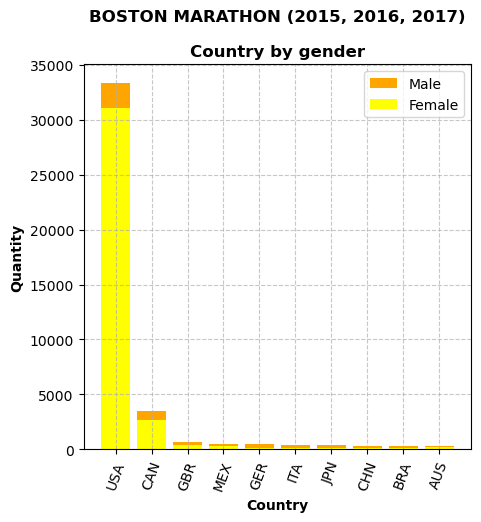

In [350]:
x_m = df_male_country_dist.head(10)
x_fm = df_female_country_dist.head(10)

plt.figure(figsize=(5,5))
width = 0.4

plt.bar(x_m.index, x_m['count'], color='orange', label='Male')
plt.bar(x_fm.index, x_fm['count'], alpha=1, color='yellow', label='Female')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=70)

plt.xlabel('Country', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nCountry by gender', fontweight='bold')

plt.savefig("./vexport/genderxcountry.png", dpi=300, bbox_inches='tight')
plt.show()

#### GENDER X COUNTRY - visualization (without USA and Canada)

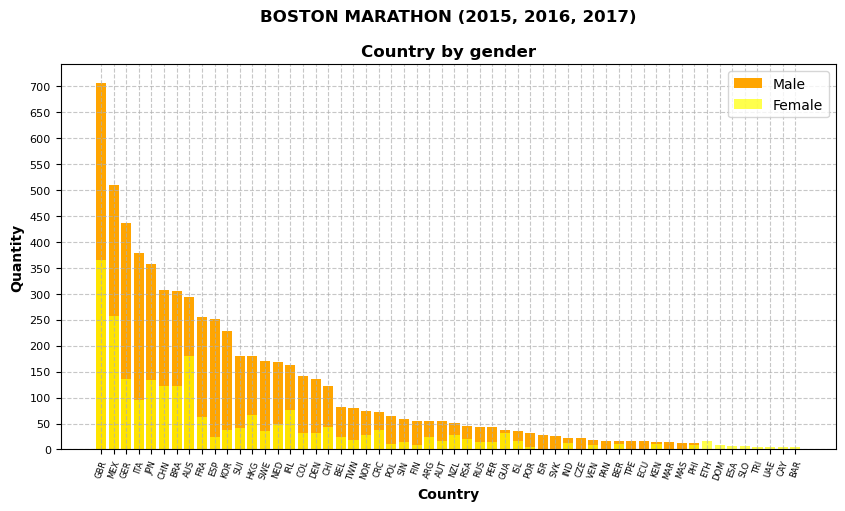

In [291]:
x_m = df_male_country_dist.head(50)
x_fm = df_female_country_dist.head(50)
x_m = x_m.drop(['USA', 'CAN'])
x_fm = x_fm.drop(['USA', 'CAN'])

plt.figure(figsize=(10,5))

ax_m = plt.bar(x_m.index, x_m['count'], color='orange', label='Male')
ax_fm = plt.bar(x_fm.index, x_fm['count'], alpha=0.7, color='yellow', label='Female')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=70, fontsize= 6)
plt.yticks(np.arange(0,701,50), fontsize=8)


plt.xlabel('Country', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nCountry by gender', fontweight='bold')

plt.savefig("./vexport/genderxcountry_noUSA_noCAN.png", dpi=300, bbox_inches='tight')
plt.show()

### GENDER X CONTINENT

#### GENDER X CONTINENT - lab

In [102]:
# males
male_continent_count = df_male_country['Continent'].value_counts()
male_continent_percent = round(df_male_country['Continent'].value_counts(normalize=True) * 100, 2)
# results df
df_male_continent_dist = pd.concat([male_continent_count, male_continent_percent], axis=1)

# females
female_continent_count = df_female_country['Continent'].value_counts()
female_continent_percent = round(df_female_country['Continent'].value_counts(normalize=True) * 100, 2)
# results df
df_female_continent_dist = pd.concat([female_continent_count, female_continent_percent], axis=1)

print('male')
print(df_male_continent_dist)
print('\nfemale')
print(df_female_continent_dist)

male
               count  proportion
Continent                       
North America  37577       86.42
Europe          3425        7.88
Asia            1332        3.06
South America    713        1.64
Oceania          345        0.79
Africa            90        0.21

female
               count  proportion
Continent                       
North America  34124       94.38
Europe          1074        2.97
Asia             440        1.22
South America    258        0.71
Oceania          209        0.58
Africa            51        0.14


#### GENDER X CONTINENT - export

In [104]:
df_male_continent_dist.to_csv('./export/mfxcontinent_male_dist.csv')
df_female_continent_dist.to_csv('./export/mfxcontinent_female_dist.csv')

### GENDER X CONTINENT - visualization

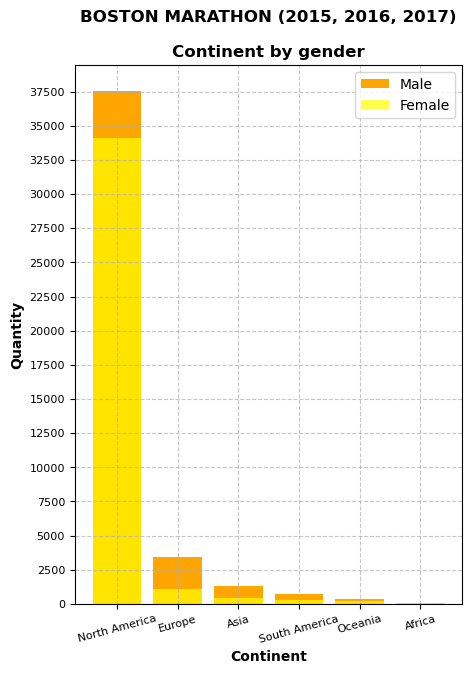

In [325]:
x_m = df_male_continent_dist
x_fm = df_female_continent_dist

plt.figure(figsize=(5,7))

ax_m = plt.bar(x_m.index, x_m['count'], color='orange', label='Male')
ax_fm = plt.bar(x_fm.index, x_fm['count'], alpha=0.7, color='yellow', label='Female')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=15, fontsize= 8)
plt.yticks(np.arange(0,37501,2500), fontsize=8)


plt.xlabel('Continent', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nContinent by gender', fontweight='bold')

plt.savefig("./vexport/genderxcontinent.png", dpi=300, bbox_inches='tight')
plt.show()

#### GENDER X CONTINENT - visualization (without North America)

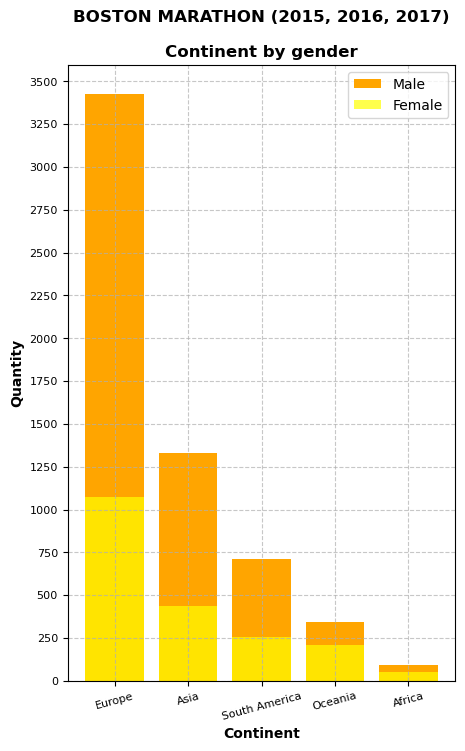

In [343]:
x_m = df_male_continent_dist
x_fm = df_female_continent_dist
x_m = x_m.drop(['North America'])
x_fm = x_fm.drop(['North America'])

plt.figure(figsize=(5,8))

ax_m = plt.bar(x_m.index, x_m['count'], color='orange', label='Male')
ax_fm = plt.bar(x_fm.index, x_fm['count'], alpha=0.7, color='yellow', label='Female')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=15, fontsize= 8)
plt.yticks(np.arange(0,3501,250), fontsize=8)


plt.xlabel('Continent', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nContinent by gender', fontweight='bold')

plt.savefig("./vexport/genderxcontinent_noNA.png", dpi=300, bbox_inches='tight')
plt.show()

## 3. MF X TIME ---------------------------------

In [368]:
df_gender_time = df.copy()[['M/F', 'Pace', 'Official Time']]

### GENDER X OFFICIAL TIME

#### GENDER X OFFICIAL TIME - lab

In [109]:
df_gender_officialtime = df_gender_time.groupby(by='M/F')['Official Time'].agg(
    min_time='min',
    max_time='max',
    mean_time='mean',
    median_time='median')
df_gender_officialtime

,min_time,max_time,mean_time,median_time
M/F,,,,
F,0 days 02:21:52,0 days 10:30:23,0 days 04:04:27.026385662,0 days 03:55:38
M,0 days 02:09:17,0 days 08:25:09,0 days 03:43:46.911664596,0 days 03:35:17


#### GENDER X OFFICIAL TIME - export

In [111]:
df_gender_officialtime.to_csv('./export/mfxofficialtime.csv')

### GENDER X OFFICIAL TIME - visualization

In [ ]:
df_gender_time['Official Time'] = df_gender_time['Official Time'].dt.total_seconds() / 3600

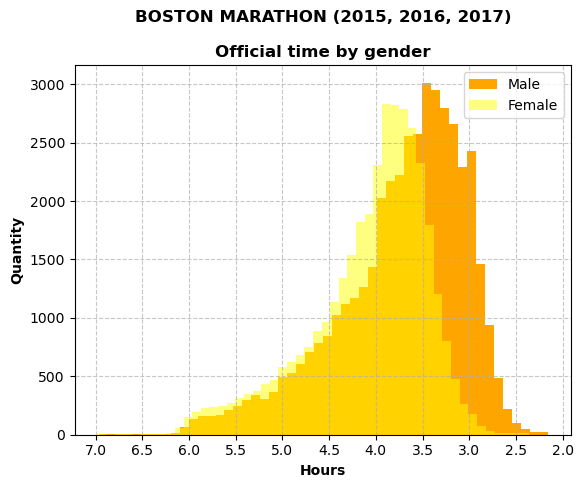

In [406]:
threshold = 7
df_gender_time = df_gender_time[df_gender_time['Official Time'] < threshold]

x_m = df_gender_time[df_gender_time['M/F'] == 'M']
x_fm = df_gender_time[df_gender_time['M/F'] == 'F']

# plt.figure(figsize=(10,5))

hist_m = plt.hist(x_m['Official Time'], bins=50, color='orange', alpha=1, label='Male')
hist_fm = plt.hist(x_fm['Official Time'], bins=50, color='yellow', alpha=0.5, label='Female')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().invert_xaxis()
plt.xticks(np.arange(7,1.5,-0.5))

plt.xlabel('Hours', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nOfficial time by gender', fontweight='bold')

plt.savefig("./vexport/genderxofficial_time.png", dpi=300, bbox_inches='tight')
plt.show()

### GENDER X PACE

#### GENDER X PACE - lab

In [114]:
df_gender_pace = df_gender_time.groupby(by='M/F')['Pace'].agg(
    min_time='min',
    max_time='max',
    mean_time='mean',
    median_time='median')
df_gender_pace

,min_time,max_time,mean_time,median_time
M/F,,,,
F,0 days 00:03:21.945637477,0 days 00:15:13.415652588,0 days 00:05:47.907992189,0 days 00:05:35.540443808
M,0 days 00:03:03.925872902,0 days 00:12:18.188976377,0 days 00:05:18.526788399,0 days 00:05:06.335997773


#### GENDER X PACE - export

In [116]:
df_gender_pace.to_csv('./export/mfxpace.csv')

### GENDER X PACE - visualization

In [411]:
df_gender_time['Pace'] = df_gender_time['Pace'].dt.total_seconds() / 60

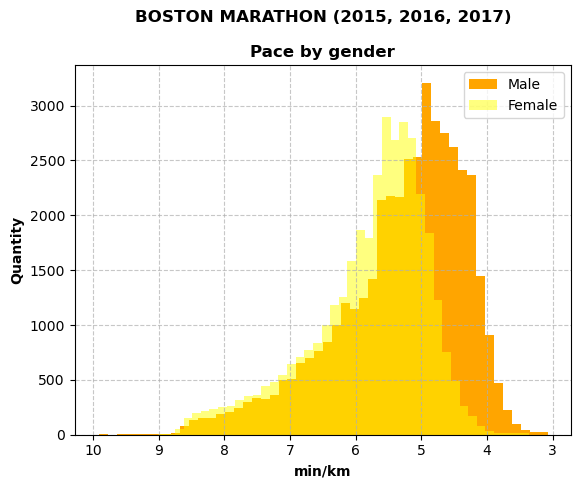

In [417]:
threshold = 10
df_gender_time = df_gender_time[df_gender_time['Pace'] < threshold]

x_m = df_gender_time[df_gender_time['M/F'] == 'M']
x_fm = df_gender_time[df_gender_time['M/F'] == 'F']

# plt.figure(figsize=(10,5))

hist_m = plt.hist(x_m['Pace'], bins=50, color='orange', alpha=1, label='Male')
hist_fm = plt.hist(x_fm['Pace'], bins=50, color='yellow', alpha=0.5, label='Female')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().invert_xaxis()
# plt.xticks(np.arange(7,1.5,-0.5))

plt.xlabel('min/km', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nPace by gender', fontweight='bold')

plt.savefig("./vexport/genderxpace.png", dpi=300, bbox_inches='tight')
plt.show()

## 4. CONTINENT X AGE ---------------------------------

In [118]:
df_continent_age = df[['Continent', 'Country', 'Age', 'Age Group']]

### CONTINENT X AGE

#### CONTINENT X AGE - lab

In [121]:
continent_age = df_continent_age.groupby(by='Continent')['Age'].agg(
    min_age='min',
    max_age='max',
    mean_age='mean',
    median_age='median')
continent_age

,min_age,max_age,mean_age,median_age
Continent,,,,
Africa,19,64,39.503546,37.0
Asia,19,81,48.676072,48.0
Europe,19,78,45.880418,46.0
North America,18,84,41.999944,42.0
Oceania,22,72,45.050542,45.0
South America,20,77,44.513903,44.0


In [122]:
continent_age_count = pd.crosstab(df_continent_age['Continent'], df_continent_age['Age'])
continent_age_count

Age,18,19,20,21,22,23,24,25,26,27,...,75,76,77,78,79,80,81,82,83,84
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,0,1,1,1,0,4,4,3,2,4,...,0,0,0,0,0,0,0,0,0,0
Asia,0,1,0,1,3,3,6,7,5,7,...,4,3,3,2,2,3,1,0,0,0
Europe,0,1,1,7,5,10,12,19,28,34,...,2,4,1,1,0,0,0,0,0,0
North America,62,134,261,480,692,899,1276,1502,1667,1700,...,32,21,14,12,5,9,4,4,3,1
Oceania,0,0,0,0,1,1,1,4,3,5,...,0,0,0,0,0,0,0,0,0,0
South America,0,0,1,0,0,3,2,4,4,5,...,1,1,1,0,0,0,0,0,0,0


#### CONTINENT X AGE - export

In [124]:
continent_age.to_csv('./export/continentxage.csv')
continent_age_count.to_csv('./export/continentxage_count.csv')

### CONTINENT X AGE - visualization

In [456]:
continent_age_count = continent_age_count.replace(0, np.nan)

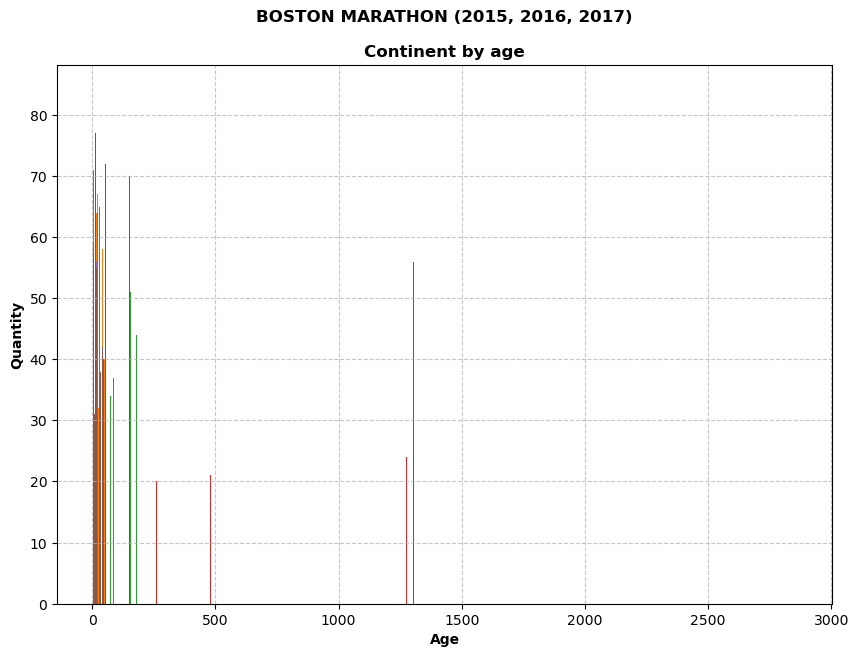

In [588]:
plt.figure(figsize=(10,7))
x = continent_age_count

# for i in continent_age_count.index:
    # plt.scatter(continent_age_count.columns, continent_age_count.loc[i], label=i, alpha=0.45)
for continent in x.index:
    counts = x.loc[continent].values
    plt.bar(counts ,x.columns, label=continent)

# plt.legend()
# plt.xticks(np.arange(20,86,5))
# plt.yticks(np.arange(0,3000,250))
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Age', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nContinent by age', fontweight='bold')

plt.show()

In [568]:
np.arange(continent_age_count.columns.min(),continent_age_count.columns.max(),1)

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83],
      dtype=int64)

### CONTINENT X AGE GROUPS

#### CONTINENT X AGE GROUPS - lab

In [127]:
continent_age_groups = pd.crosstab(df_continent_age['Continent'], df_continent_age['Age Group'])
continent_age_groups

Age Group,18–21,22–25,26–29,30–33,34–37,38–41,42–45,46–49,50–53,54–57,58–61,62–65,66–69,70–84
Continent,,,,,,,,,,,,,,
Africa,3,11,21,22,14,8,16,15,10,8,6,7,0,0
Asia,2,19,44,88,140,151,241,263,252,202,157,97,69,47
Europe,9,46,155,280,400,573,704,738,635,454,275,121,69,40
North America,937,4369,6861,6701,7626,8509,8648,8644,7211,5360,3634,1851,865,485
Oceania,0,7,19,39,63,68,99,84,62,60,25,20,5,3
South America,1,9,28,58,136,148,167,156,112,70,43,25,10,8


#### CONTINENT X AGE GROUPS - export

In [129]:
continent_age_groups.to_csv('./export/continentxagegroups_dist.csv')

## 5. AGE X TIME ---------------------------------

In [131]:
df_age_time = df[['Age', 'Age Group', 'Pace', 'Official Time']]

### AGE X OFFICIAL TIME

#### AGE X OFFICIAL TIME - lab

In [134]:
age_official_time = df_age_time.groupby(by='Age')['Official Time'].agg(
    min_officialtime='min',
    max_officialtime='max',
    mean_officialtime='mean',
    median_officialtime='median')
age_official_time

,min_officialtime,max_officialtime,mean_officialtime,median_officialtime
Age,,,,
18,0 days 02:46:59,0 days 06:03:14,0 days 04:15:25.387096774,0 days 04:15:45.500000
19,0 days 02:27:11,0 days 07:04:33,0 days 04:00:38.583941605,0 days 03:48:49
20,0 days 02:22:21,0 days 06:01:34,0 days 03:51:15.193181818,0 days 03:44:17
21,0 days 02:12:45,0 days 06:01:29,0 days 03:53:03.292433537,0 days 03:43:28
22,0 days 02:27:16,0 days 06:01:31,0 days 03:54:20.863052781,0 days 03:46:20
...,...,...,...,...
80,0 days 04:14:10,0 days 05:59:54,0 days 04:56:46.583333333,0 days 04:45:02
81,0 days 04:26:49,0 days 06:08:10,0 days 05:12:45.600000,0 days 05:20:49
82,0 days 04:18:00,0 days 05:57:54,0 days 05:22:37.250000,0 days 05:37:17.500000


In [135]:
age_groups_official_time = df_age_time.groupby(by='Age Group')['Official Time'].agg(
    min_officialtime='min',
    max_officialtime='max',
    mean_officialtime='mean',
    median_officialtime='median')
age_groups_official_time

,min_officialtime,max_officialtime,mean_officialtime,median_officialtime
Age Group,,,,
18–21,0 days 02:12:45,0 days 07:04:33,0 days 03:55:06.240546218,0 days 03:46:33
22–25,0 days 02:09:17,0 days 07:16:59,0 days 03:49:14.993499215,0 days 03:38:45
26–29,0 days 02:10:22,0 days 06:13:24,0 days 03:45:36.662878787,0 days 03:35:14
30–33,0 days 02:09:48,0 days 06:52:10,0 days 03:44:09.837367835,0 days 03:33:58.500000
34–37,0 days 02:17:40,0 days 10:30:23,0 days 03:43:36.139038071,0 days 03:35:37
38–41,0 days 02:12:42,0 days 08:23:27,0 days 03:46:55.285502802,0 days 03:39:53
42–45,0 days 02:18:44,0 days 07:22:23,0 days 03:49:26.704202531,0 days 03:43:51
46–49,0 days 02:24:49,0 days 07:58:14,0 days 03:52:48.105555555,0 days 03:47:22
50–53,0 days 02:30:57,0 days 08:00:37,0 days 03:57:34.878048780,0 days 03:51:44


#### AGE X OFFICIAL TIME - export

In [137]:
age_official_time.to_csv('./export/agexofficialtime.csv')
age_groups_official_time.to_csv('./export/agegroupsxofficialtime.csv')

### AGE X PACE

#### AGE X PACE - lab

In [140]:
age_pace = df_age_time.groupby(by='Age')['Pace'].agg(
    min_pace='min',
    max_pace='max',
    mean_pace='mean',
    median_pace='median')
age_pace

,min_pace,max_pace,mean_pace,median_pace
Age,,,,
18,0 days 00:03:57.985166626,0 days 00:08:36.980831941,0 days 00:06:03.532213806,0 days 00:06:03.812833054
19,0 days 00:03:29.402091783,0 days 00:10:03.972798854,0 days 00:05:42.502522494,0 days 00:05:25.598504732
20,0 days 00:03:22.567008669,0 days 00:08:34.495347172,0 days 00:05:29.140791263,0 days 00:05:19.384792809
21,0 days 00:03:08.896842440,0 days 00:08:34.495347172,0 days 00:05:31.695312462,0 days 00:05:18.142050425
22,0 days 00:03:30.023462976,0 days 00:08:34.495347172,0 days 00:05:33.528300289,0 days 00:05:21.870277578
...,...,...,...,...
80,0 days 00:06:01.638033882,0 days 00:08:32.009862403,0 days 00:07:02.221725124,0 days 00:06:45.444702934
81,0 days 00:06:19.657798457,0 days 00:08:43.815915056,0 days 00:07:25.026047880,0 days 00:07:36.707826294
82,0 days 00:06:07.230374612,0 days 00:08:29.524377634,0 days 00:07:39.193311063,0 days 00:08:00.009246003


In [141]:
age_groups_pace = df_age_time.groupby(by='Age Group')['Pace'].agg(
    min_pace='min',
    max_pace='max',
    mean_pace='mean',
    median_pace='median')
age_groups_pace

,min_pace,max_pace,mean_pace,median_pace
Age Group,,,,
18–21,0 days 00:03:08.896842440,0 days 00:10:03.972798854,0 days 00:05:34.615566728,0 days 00:05:22.491648771
22–25,0 days 00:03:03.925872902,0 days 00:10:21.371192237,0 days 00:05:26.291749390,0 days 00:05:11.306967310
26–29,0 days 00:03:05.789986478,0 days 00:08:51.272369362,0 days 00:05:21.113962137,0 days 00:05:06.335997773
30–33,0 days 00:03:05.168615286,0 days 00:09:46.574405472,0 days 00:05:19.062091270,0 days 00:05:04.471884196
34–37,0 days 00:03:16.353296746,0 days 00:15:13.415652588,0 days 00:05:18.266932760,0 days 00:05:06.957368965
38–41,0 days 00:03:08.896842440,0 days 00:11:56.440984649,0 days 00:05:22.982267221,0 days 00:05:13.171080887
42–45,0 days 00:03:17.596039131,0 days 00:10:29.449017736,0 days 00:05:26.572500142,0 days 00:05:18.763421617
46–49,0 days 00:03:26.295235822,0 days 00:12:18.188976377,0 days 00:05:31.385604533,0 days 00:05:23.734391155
50–53,0 days 00:03:34.994432514,0 days 00:11:23.508311461,0 days 00:05:38.138768744,0 days 00:05:29.948103078


#### AGE X PACE - export

In [143]:
age_pace.to_csv('./export/agexpace.csv')
age_groups_pace.to_csv('./export/agegroupsxpace.csv')

## 6. CONTINENT X TIME ---------------------------------

In [145]:
df_continent_time = df[['Continent', 'Country', 'Pace', 'Official Time']]

### CONTINENT X OFFICIAL TIME

#### CONTINENT X OFFICIAL TIME - lab

In [148]:
continent_officialtime = df_continent_time.groupby(by='Continent')['Official Time'].agg(
    min_time='min',
    max_time='max',
    mean_time='mean',
    median_time='median')
continent_officialtime

,min_time,max_time,mean_time,median_time
Continent,,,,
Africa,0 days 02:09:17,0 days 05:52:09,0 days 03:26:48.340425531,0 days 03:04:55
Asia,0 days 02:10:28,0 days 06:37:48,0 days 04:04:07.472911963,0 days 03:56:30.500000
Europe,0 days 02:13:52,0 days 06:07:01,0 days 03:50:14.135807957,0 days 03:44:14
North America,0 days 02:09:58,0 days 10:30:23,0 days 03:53:24.371668456,0 days 03:46:42
Oceania,0 days 02:28:18,0 days 06:37:04,0 days 03:47:44.588447653,0 days 03:41:36.500000
South America,0 days 02:24:54,0 days 06:16:50,0 days 03:35:53.294541709,0 days 03:31:33


#### CONTINENT X OFFICIAL TIME - export

In [150]:
continent_officialtime.to_csv('./export/continentxofficialtime.csv')

### CONTINENT X PACE

#### CONTINENT X PACE - lab

In [153]:
continent_pace = df_continent_time.groupby(by='Continent')['Pace'].agg(
    min_time='min',
    max_time='max',
    mean_time='mean',
    median_time='median')
continent_pace

,min_time,max_time,mean_time,median_time
Continent,,,,
Africa,0 days 00:03:03.925872902,0 days 00:08:20.825180943,0 days 00:04:54.397738483,0 days 00:04:23.461385508
Asia,0 days 00:03:05.789986478,0 days 00:09:26.069156128,0 days 00:05:47.448188133,0 days 00:05:36.783186192
Europe,0 days 00:03:10.760956016,0 days 00:08:41.951801479,0 days 00:05:27.694924675,0 days 00:05:19.384792809
North America,0 days 00:03:05.168615286,0 days 00:15:13.415652588,0 days 00:05:32.208666744,0 days 00:05:22.491648771
Oceania,0 days 00:03:31.266205360,0 days 00:09:24.826413743,0 days 00:05:24.137048660,0 days 00:05:15.345880060
South America,0 days 00:03:26.295235822,0 days 00:08:56.243338900,0 days 00:05:07.301650840,0 days 00:05:01.365028235


#### CONTINENT X PACE - export

In [155]:
continent_pace.to_csv('./export/continentxpace.csv')